In [1]:
import time
from pprint import pprint
from IPython.display import display

from sympy import *
init_printing()

from fda_ode import *

In [2]:
eps, t, h, a, b = symbols(r'\varepsilon, t, h, alpha, beta', real=True)
u, u1 = (f(t) for f in symbols('u, u1', cls=Function))

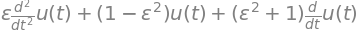

In [3]:
eq = eps*u.diff(t, 2) + (1 + eps**2)*u.diff(t) + (1 - eps**2)*u
display(eq)

## Nayfeh A. H. Introduction to Perturbation Techniques, Wiley-VCH, 1st edition, 1993. 536 p.

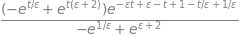

In [4]:
s = dsolve(eq, u, ics={u.subs(t, 0): 0, u.subs(t, 1): 1})
display(s.args[1].expand().simplify())

In [5]:
sol = {u: s.args[1], u1: s.args[1].diff(t)}

In [6]:
init((u, u1), t, h)

In [7]:
set_clip(8, 7, Rational(0, 1))

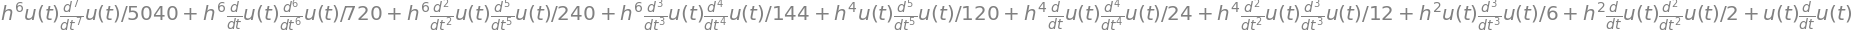

In [8]:
expand((T(u.subs(t, t+h)**2)-T(u.subs(t, t-h)**2))/(4*h))

$$\frac{1}{6}ux_{i+1} + \frac{2}{3}ux_{i} + \frac{1}{6}ux_{i-1} = \frac{u_{i+1}-u_{i-1}}{2h}$$

In [9]:
F1 = clip((T(u1.subs(t, t+h))/6 + 2*T(u1)/3 + T(u1.subs(t, t-h))/6) -\
           (T(u.subs(t, t+h)) - T(u.subs(t, t-h)))/(2*h))
prn(F1, eps)

h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


h^5 =>


h^6 =>


$$6 (1 + {\varepsilon^2}) {ux}_{{j} + 1} + 3\frac{(1 + {\varepsilon^2}) \left({u}_{{j} + 2} - {u}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left({u}_{{j} + 2} + 10 {u}_{{j} + 1} + {u}_{{j}}\right) + 12\frac{\varepsilon \left({u}_{{j} + 2} - 2{u}_{{j} + 1}  + {u}_{{j}}\right)}{h^{2}}=0$$

In [10]:
F2 = clip((1 + eps**2)*T(u1)/2 + (1 + eps**2)*(T(u.subs(t, t+h)) - T(u.subs(t, t-h)))/(4*h) +
          (1 - eps**2)*(T(u.subs(t, t+h)) + 10*T(u) + T(u.subs(t, t-h)))/12 +
          eps*(T(u.subs(t, t+h)) - 2*T(u) + T(u.subs(t, t-h)))/(h**2))
prn(F2, eps)

h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


h^5 =>


h^6 =>


h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


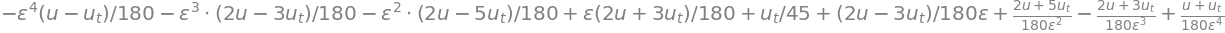

h^5 =>


h^6 =>


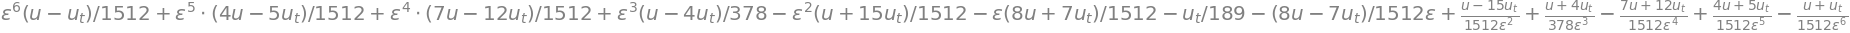

In [11]:
f1 = NF(F1, [u1, u.diff(t, 2)], [F1, F2], head=False)
prn(f1, eps)

h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


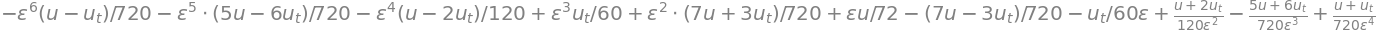

h^5 =>


h^6 =>


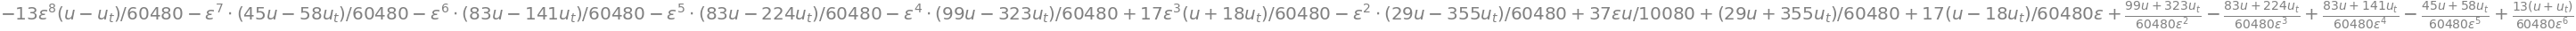

In [12]:
f2 = NF(F2, [u1, u.diff(t, 2)], [F1, F2], head=False)
prn(f2, eps)

$$6 (1 + {\varepsilon^2}) {ux}_{{j}} + \frac{(1 + {\varepsilon^2}) \left(3 {u}_{{j} + 1} - 30 {u}_{{j} + 2} - 3 {u}_{{j} + 3} + 30 {u}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(- 41 {u}_{{j} + 1} - 14 {u}_{{j} + 2} - {u}_{{j} + 3} - 4 {u}_{{j}}\right) + \frac{\varepsilon \left(84 {u}_{{j} + 1} - 24 {u}_{{j} + 2} - 12 {u}_{{j} + 3} - 48 {u}_{{j}}\right)}{h^{2}}=0$$

In [13]:
F4 = clip(6*(1+eps**2)*T(u1) +
    (1+eps**2)*(3*T(u.subs(t, t+h)) - 30*T(u.subs(t, t+2*h))- 3*(T(u.subs(t, t+3*h)) + 30*T(u)))/h -
    (1-eps**2)*(-41*T(u.subs(t, t+h)) - 14*T(u.subs(t, t+2*h)) - T(u.subs(t, t+3*h)) - 4*T(u)) + 
    eps*(84*T(u.subs(t, t+h)) - 24*T(u.subs(t, t+2*h)) - 12*T(u.subs(t, t+3*h)) - 48*T(u))/h**2)
prn(F4, eps)

h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


h^5 =>


h^6 =>


h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


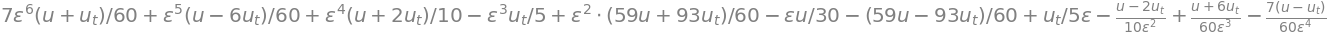

h^5 =>


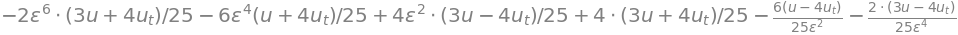

h^6 =>


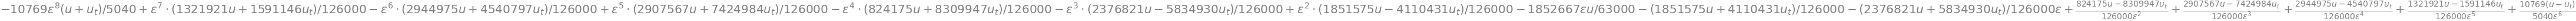

In [14]:
f4 = NF(F4, [u1, u.diff(t, 2)], [f1, F4], head=False)
prn(f4, eps)

$$6 (1 + {\varepsilon^2}) {ux}_{{j} + 3} + \frac{(1 + {\varepsilon^2}) \left(30 {u}_{{j} + 1} - 3 {u}_{{j} + 2} - 30 {u}_{{j} + 3} + 3 {u}_{{j}}\right)}{h} + (1 - {\varepsilon^2}) \left(- 14 {u}_{{j} + 1} - 41 {u}_{{j} + 2} - 4 {u}_{{j} + 3} - {u}_{{j}}\right) + \frac{\varepsilon \left(- 24 {u}_{{j} + 1} + 84 {u}_{{j} + 2} - 48 {u}_{{j} + 3} - 12 {u}_{{j}}\right)}{h^{2}}=0$$

In [15]:
F5 = clip(6*(1+eps**2)*T(u.subs(t, t+3*h).diff(t)) +
    (1+eps**2)*(30*T(u.subs(t, t+h)) - 3*T(u.subs(t, t+2*h))- 30*(T(u.subs(t, t+3*h)) + 30*T(u)))/h -
    (1-eps**2)*(-14*T(u.subs(t, t+h)) - 41*T(u.subs(t, t+2*h)) - 4*T(u.subs(t, t+3*h)) - T(u)) + 
    eps*(-24*T(u.subs(t, t+h)) + 84*T(u.subs(t, t+2*h)) - 48*T(u.subs(t, t+3*h)) - 12*T(u))/h**2)
prn(F5, eps)
prnlatex(F5, eps)

h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


h^5 =>


h^6 =>


- 60 \varepsilon^{2} \left(u + u_{t}\right) - 60 \varepsilon u_{tt} + 60 \left(u - u_{t}\right)
+h\left(
- 108 \varepsilon^{2} \left(u_{tt} + u_{t}\right) - 108 \varepsilon u_{ttt} - 108 \left(u_{tt} - u_{t}\right)
\right)
+h^2\left(
- 107 \varepsilon^{2} \left(u_{ttt} + u_{tt}\right) - 107 \varepsilon u_{tttt} - 107 \left(u_{ttt} - u_{tt}\right)
\right)
+h^3\left(
- 75 \varepsilon^{2} \left(u_{tttt} + u_{ttt}\right) - 75 \varepsilon u_{ttttt} - 75 \left(u_{tttt} - u_{ttt}\right)
\right)
+h^4\left(
- \frac{\varepsilon^{2} \cdot \left(2463 u_{ttttt} + 2485 u_{tttt}\right)}{60} - \frac{247 \varepsilon u_{tttttt}}{6} - \frac{2463 u_{ttttt} - 2485 u_{tttt}}{60}
\right)
+h^5\left(
- \frac{\varepsilon^{2} \cdot \left(369 u_{tttttt} + 383 u_{ttttt}\right)}{20} - \frac{187 \varepsilon u_{ttttttt}}{10} - \frac{369 u_{tttttt} - 383 u_{ttttt}}{20}
\right)
+h^6\left(
- \frac{\varepsilon^{2} \cdot \left(17673 u_{ttttttt} + 19439 u_{tttttt}\right)}{2520} - \frac{17673 u_{ttttttt} - 19439 u_{tttttt}}

h^0 =>


h^1 =>


h^2 =>


h^3 =>


h^4 =>


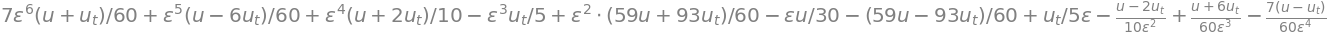

h^5 =>


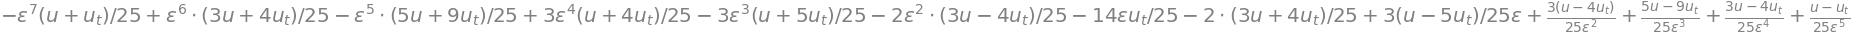

h^6 =>


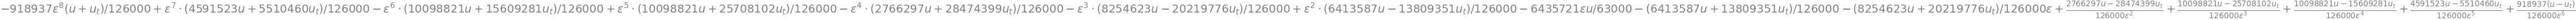

In [16]:
f5 = NF(F5, [u1, u.diff(t, 2)], [f1, F5], head=False)
prn(f5, eps)